# Dimension Reduction with PCA

In this notebook, we will take a look at how PCA can be used to visualize high-dimensional data.

## MNIST Dataset

To use some realistic data, let's load the famous MNIST dataset, consisting of hand drawn digits $0,1,\ldots,9$. There is a built in `sklearn` function to load this dataset (it loads a small version of the full MNIST dataset, with a relatively small number of low-resolution images).

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

This version of MNIST contains 1797 samples of handwritten digits, represented $8 \times 8$ images. We can think of these as vectors in $\mathbb{R}^{8 \times 8} \approx \mathbb{R}^{64}$.

Here are a few samples from the dataset.

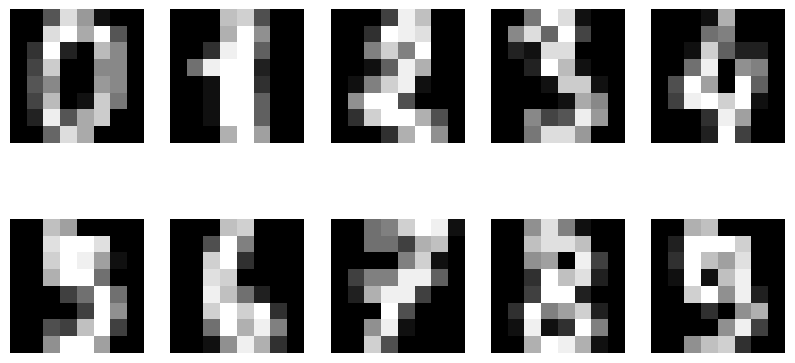

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.axis('off')
    plt.imshow(digits.images[j], cmap='gray')
    
plt.show()

We can get nicer-looking pictures by applying a filter to smooth the data (this is only for visualization purposes).

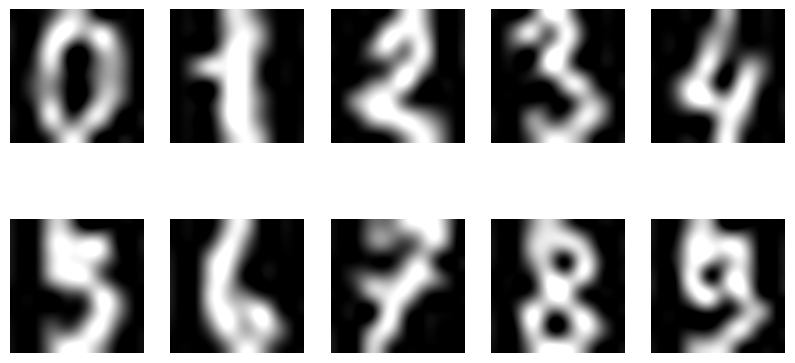

In [6]:
fig = plt.figure(figsize=(10,5))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.axis('off')
    plt.imshow(digits.images[j], cmap='gray', interpolation = 'lanczos')
    
plt.show()

## PCA on MNIST

Recall that our `digits.data` matrix has shape 1797 x 64 = samples x features. 

Using our terminology from class, we have a dataset $$\{\vec{x}_1,\ldots,\vec{x}_{1797}\},$$ where each $\vec{x}_i \in \mathbb{R}^{64}$. This is recorded as the "data matrix" 
$$
X = \begin{pmatrix}
\vec{x}_1^T \\
\vec{x}_2^T \\
\cdots \\
\vec{x}_{1797}^T \end{pmatrix},
$$
where the superscript $T$ indicatest the *transpose* operation, turning a column vector into a row vector.

We can apply PCA to this data matrix. Recall from class that PCA returns an orthonormal basis $\{\vec{v}_1,\ldots,\vec{v}_{64}\}$, defined as follows. The first principal vector $\vec{v}_1$ solves the optimization problem 
$$
\mathrm{minimize} \quad \sum_{i=1}^{1797} \left\| \vec{x}_i - \langle \vec{x}_i, \vec{v} \rangle \vec{v}\right\|^2 \quad \mbox{among all unit vectors $\vec{v}$}.
$$
The second principal vector solves the optimization problem
$$
\mathrm{minimize} \quad \sum_{i=1}^{1797} \left\| \vec{x}_i - \langle \vec{x}_i, \vec{v} \rangle \vec{v}\right\|^2 \quad \mbox{among all unit vectors $\vec{v}$ which are orthogonal to $\vec{v}_1$}.
$$
The remaining vectors in the basis are defined recursively. 

We haven't learned how to actually solve this problem yet, but we can use a built-in method from `sklearn` to do it computationally.

In [8]:
from sklearn.decomposition import PCA

pca = PCA() # Initialize the model
pca.fit(digits.data) # fit the model to our data matrix

PCA()

The fitted PCA model has various attributes. The singularvectors we are interested are stored in the `components_` attribute.

In [10]:
print(pca.components_.shape)
print(pca.components_[:,1])

(64, 64)
[-1.73094651e-02 -1.01064569e-02  1.83420720e-02  2.00129102e-02
  1.40785917e-02 -9.63005661e-03 -2.48955281e-03  2.26464557e-02
 -1.69783375e-02  2.48761282e-02  2.47267672e-03 -6.94806380e-03
 -2.68117485e-02  5.27412999e-02 -9.64267716e-03 -5.83711442e-03
 -7.77679339e-03 -2.33355229e-02 -1.91988157e-02 -4.24501340e-03
  2.64059374e-02  8.70231738e-03  2.73063253e-02 -5.00368907e-02
 -2.04067438e-02  3.24840425e-03  8.24410330e-03  9.17016581e-03
  1.79906763e-03 -5.30873742e-02  7.32445879e-03 -8.21540513e-02
 -3.72753162e-02 -2.82250807e-02 -2.92369758e-02 -2.22305267e-02
 -2.57463297e-02  2.20292708e-02 -1.10277852e-02 -6.59218383e-02
 -2.23036286e-02  1.43477215e-01  4.47168068e-02 -5.40694752e-02
 -1.20937445e-01 -6.71643153e-02 -1.06708736e-02 -1.00061452e-01
  6.01671843e-01  7.22076025e-03 -1.72604464e-03 -7.42153872e-01
 -7.85828334e-03 -4.68044443e-03  1.66910220e-02 -1.65920098e-02
  1.60386679e-02 -3.76592840e-03 -4.68394034e-03 -1.29274497e-03
  5.98484717e-03

Specifically, `pca.components_` is a 64x64 matrix containing all PCA vectors of our data matrix as its columns.

Remember, the motivation for PCA was to find a good low-dimensional subspace to project our data onto.

Given the PCA basis $\{\vec{v}_1,\ldots,\vec{v}_{64}\}$, we can project a vector $\vec{x} \in \mathbb{R}^{64}$ onto the 2-dimensional subspace $\mathrm{span}\left[\{\vec{v}_1,\vec{v}_2\}\right] \subset \mathbb{R}^{64}$ via the map
$$
\vec{x} \mapsto \left[\begin{matrix} \langle \vec{x},\vec{v}_1 \rangle \\ \langle \vec{x},\vec{v}_2 \rangle \end{matrix}\right].
$$
This simple formula is due to the fact that the PCA basis is orthonormal!

Since this subspace is 2-dimensional, we can visualize the results!

In [11]:
pVec0 = pca.components_[0]
pVec1 = pca.components_[1]

import numpy as np

projectedMNIST = []

# Now we linearly project every sample in our dataset onto the two-dimensional subspace spanned by the first 
# two singular vectors
for j in range(1797):
    projectedMNIST.append([np.dot(digits.data[j],pVec0),np.dot(digits.data[j],pVec1)])

projectedMNIST = np.array(projectedMNIST)

Since we projected onto a two-dimensional plane, we can now visualize our data!

The figure below shows our 64-dimensional data, projected onto our 2-dimensional PCA subspace. The dots are colored by their 'class' (i.e., which digit is drawn, 0,1,...,9).

/var/folders/pl/dmrd__g90wl2vvwjw6nshkn80000gp/T/ipykernel_49703/2085982803.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral_r', 10))


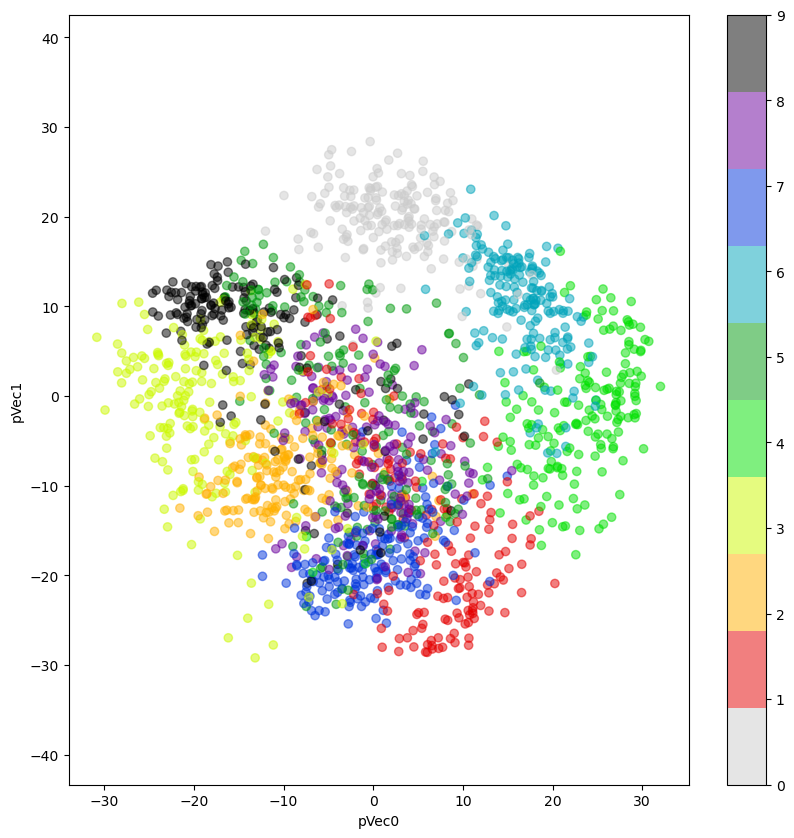

In [12]:
plt.figure(figsize=(10,10))

plt.scatter(projectedMNIST[:, 0], projectedMNIST[:, 1],
            c=digits.target, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

plt.xlabel('pVec0')
plt.ylabel('pVec1')
plt.axis('equal')
plt.colorbar();

We see that our data is separated out in some sensible way according to class!

As a **baseline**, here's what we get if we project onto a random 2-dimensional subspace of our 64-dimensional data space.

/var/folders/pl/dmrd__g90wl2vvwjw6nshkn80000gp/T/ipykernel_49703/549965109.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral_r', 10))


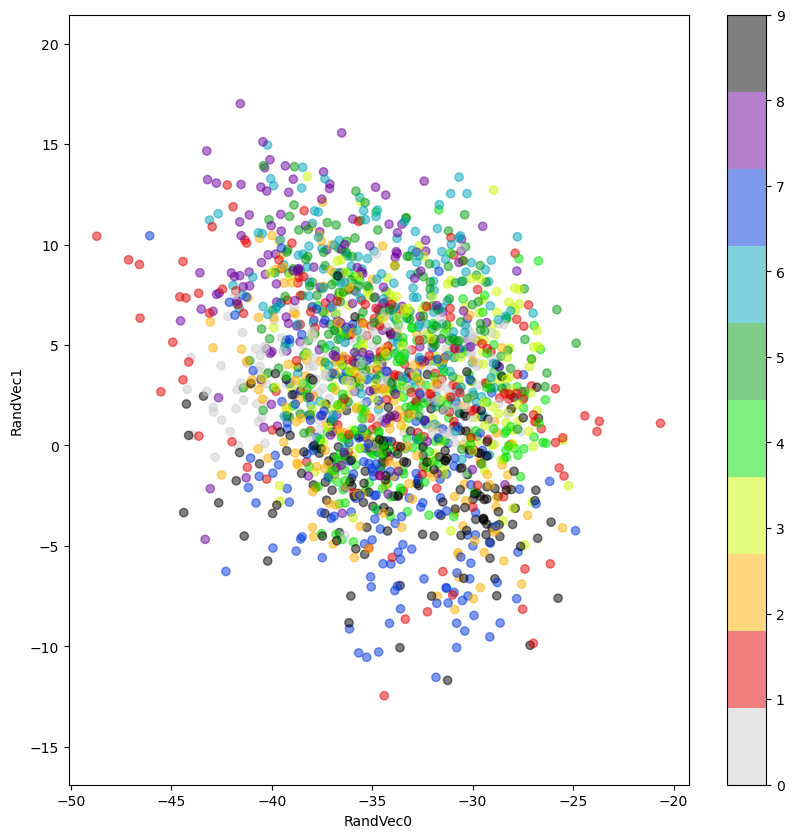

In [13]:
from scipy.linalg import orth

RandVecs = orth(np.random.rand(64,2))

RandVec0 = RandVecs[:,0]
RandVec1 = RandVecs[:,1]

import numpy as np

RandProjectedMNIST = []

for j in range(1797):
    RandProjectedMNIST.append([np.dot(digits.data[j],RandVec0),np.dot(digits.data[j],RandVec1)])

RandProjectedMNIST = np.array(RandProjectedMNIST)

plt.figure(figsize=(10,10))

plt.scatter(RandProjectedMNIST[:, 0], RandProjectedMNIST[:, 1],
            c=digits.target, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

plt.xlabel('RandVec0')
plt.ylabel('RandVec1')
plt.axis('equal')
plt.colorbar();

So we see that PCA is really doing some work for us!

In this image application, we can also visualize our principal vectors--we just need to reshape the 64-dimensional vectors into 8x8 images.

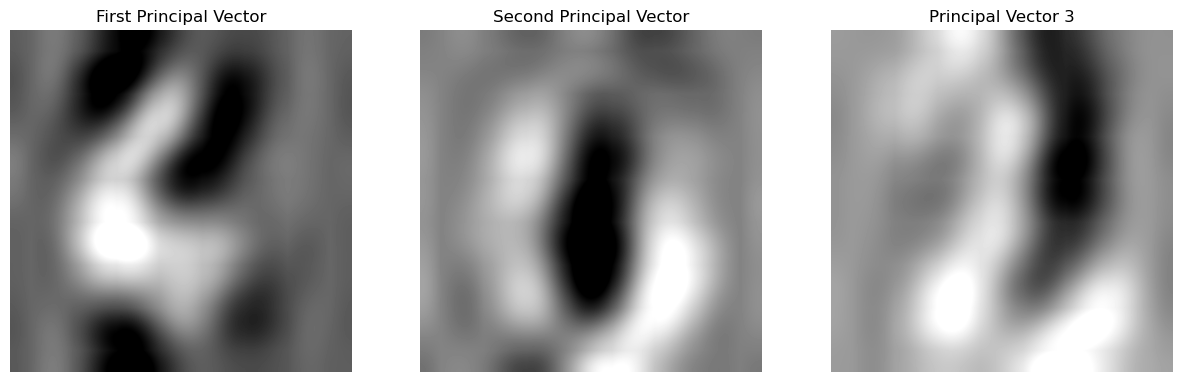

In [15]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.imshow(pVec0.reshape(8,8),cmap='gray', interpolation = 'sinc')
plt.axis('off')
plt.title('First Principal Vector')

plt.subplot(1,3,2)
plt.imshow(pVec1.reshape(8,8),cmap='gray', interpolation = 'sinc')
plt.axis('off')
plt.title('Second Principal Vector')

k = 2
plt.subplot(1,3,3)
plt.imshow(pca.components_[k].reshape(8,8),cmap='gray', interpolation = 'sinc')
plt.axis('off')
plt.title('Principal Vector '+str(k+1))

plt.show()

Eyeballing (so we are perhaps subject to confirmation bias...), we see that the first principal vector seems sensitive to picking out shapes that look like '4', while the second is sensitive to shapes that look like '0'. This is confirmed by the scatter plot. 

Moreover, looking at the negative PC1 direction, it seems that '3' is the "least '4'-like" digit. The PC2 direction shows that '1' is the "least '0'-like" digit. 

As we increas $k$, the $k$th principal vector becomes less and less interpretable to human eyes.

Typically, the first few principal vectors capture the majority of the variability in the data.

The statement above can be quantified using the *explained variance ratio*, which is the function
\begin{align*}
\mathrm{EVR}:\{1,\ldots,m\} &\to \mathbb{R} \\
k &\mapsto \frac{1}{T} \sum_{i=1}^k \sigma_i^2,
\end{align*}
where $\sigma_i$ is the $i$-th singular value of the data matrix, $m$ is the number of samples, and $T$ is the total sum of squared singular values (to normalize).

**Note:** We haven't officially defined singular values yet---that will be done this week---but the plots below are still intuitive.


For our data, this looks like:

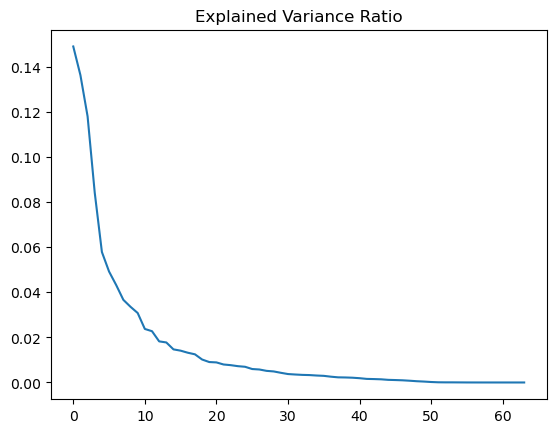

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.show()

This shows that the first few principal vectors are really doing the heavy lifting in representing the data.

It is also informative to look at the 'running total' of explained variance, which shows how much total variance is explained as a percentage by the first $k$ principal vectors.

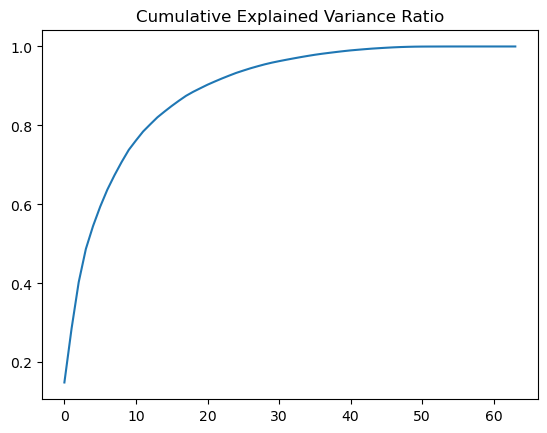

In [17]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Explained Variance Ratio')
plt.show()

This means that 80% of the variation in the data is captured by ~10 principal vectors.